<a href="https://colab.research.google.com/github/Sowmiya1435/DataAnalysisProject-with-OasisInfobyte/blob/main/MCDonaldsNutritionFacts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download mcdonalds/nutrition-facts

Dataset URL: https://www.kaggle.com/datasets/mcdonalds/nutrition-facts
License(s): unknown
  0% 0.00/7.37k [00:00<?, ?B/s]
100% 7.37k/7.37k [00:00<00:00, 1.60MB/s]


In [4]:
!unzip nutrition-facts.zip

Archive:  nutrition-facts.zip
  inflating: menu.csv                


**Importing Libraries & Dataset**

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
import re

In [6]:
data=pd.read_csv("menu.csv")
data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


**Structure of the Dataset**

In [7]:
data.isna().sum()

,0
Category,0
Item,0
Serving Size,0
Calories,0
Calories from Fat,0
Total Fat,0
Total Fat (% Daily Value),0
Saturated Fat,0
Saturated Fat (% Daily Value),0
Trans Fat,0


In [8]:
data.nunique()

,0
Category,9
Item,260
Serving Size,107
Calories,78
Calories from Fat,48
Total Fat,52
Total Fat (% Daily Value),63
Saturated Fat,26
Saturated Fat (% Daily Value),74
Trans Fat,5


In [9]:
data.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [10]:
print("Number of duplicate rows:", data.duplicated().sum())
print(data.duplicated())

Number of duplicate rows: 0
0      False
1      False
2      False
3      False
4      False
       ...  
255    False
256    False
257    False
258    False
259    False
Length: 260, dtype: bool


In [11]:
data.shape

(260, 24)

In [12]:
print(data.dtypes)

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

**Data Cleaning**

In [19]:
# Step 1: Standardize unit names (OZ → oz, G → g)
data['Serving Size'] = (
    data['Serving Size']
    .str.replace(r'\boz\b', 'oz', flags=re.IGNORECASE, regex=True)
    .str.replace(r'\bg\b', 'g', flags=re.IGNORECASE, regex=True)
)

# Step 2: Extract numeric value and unit (first occurrence of oz or g)
def parse_serving_size(text):
    match = re.search(r'(\d+\.?\d*)\s*(oz|g)', str(text), flags=re.IGNORECASE)
    if match:
        value = float(match.group(1))
        unit = match.group(2).lower()
        return value, unit
    return None, None

# Apply parsing to each row
data[['Value', 'Unit']] = data['Serving Size'].apply(lambda x: pd.Series(parse_serving_size(x)))

# Step 3: Fill known patterns with approximate gram estimates
manual_fills = {
    'cone': 75,
    'packet': 10,
    'cookie': 20,
    'bar': 45,
    'muffin': 90,
    'slice': 50,
    'bagel': 70,
    'pancake': 100,
    'cup': 240,
    'bottle': 500,
    'wrap': 180
}

for pattern, grams in manual_fills.items():
    mask = data['Serving Size'].str.contains(pattern, case=False, na=False) & data['Value'].isna()
    data.loc[mask, ['Value', 'Unit']] = [grams, 'g']

# Optional: Set 'varies' explicitly to missing
data.loc[data['Serving Size'].str.contains('varies', case=False, na=False), ['Value', 'Unit']] = [np.nan, np.nan]

# Step 4: Convert to grams using conversion factors
conversion_factors = {'oz': 28.35, 'g': 1.0}

data['Serving Size (g)'] = data.apply(
    lambda row: row['Value'] * conversion_factors[row['Unit']]
    if pd.notnull(row['Value']) and row['Unit'] in conversion_factors
    else np.nan,
    axis=1
)

# Final check
print("✅ Missing in Value:", data['Value'].isna().sum())
print("✅ Missing in Unit:", data['Unit'].isna().sum())
print("✅ Missing in Serving Size (g):", data['Serving Size (g)'].isna().sum())


✅ Missing in Value: 4
✅ Missing in Unit: 4
✅ Missing in Serving Size (g): 4


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [23]:
missing_rows = data[data['Value'].isna()][['Item', 'Serving Size']]
print(missing_rows)

                                 Item       Serving Size
130               1% Low Fat Milk Jug  1 carton (236 ml)
131       Fat Free Chocolate Milk Jug  1 carton (236 ml)
132  Minute Maid 100% Apple Juice Box   6 fl oz (177 ml)
136               Dasani Water Bottle         16.9 fl oz


In [24]:
# Fill by estimating 1 ml ≈ 1 g or 1 fl oz ≈ 29.57 g
data.loc[data['Serving Size'] == '1 carton (236 ml)', ['Value', 'Unit']] = [236, 'g']
data.loc[data['Serving Size'] == '6 fl oz (177 ml)', ['Value', 'Unit']] = [177, 'g']
data.loc[data['Serving Size'] == '16.9 fl oz', ['Value', 'Unit']] = [500, 'g']  # standard bottle size

In [25]:
data['Serving Size (g)'] = data.apply(
    lambda row: row['Value'] * conversion_factors.get(row['Unit'], np.nan)
    if pd.notnull(row['Value']) and pd.notnull(row['Unit'])
    else np.nan,
    axis=1
)
print("✅ Final missing in Value:", data['Value'].isna().sum())
print("✅ Final missing in Unit:", data['Unit'].isna().sum())
print("✅ Final missing in Serving Size (g):", data['Serving Size (g)'].isna().sum())

✅ Final missing in Value: 0
✅ Final missing in Unit: 0
✅ Final missing in Serving Size (g): 0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

**Correlation with Serving Size (g)**

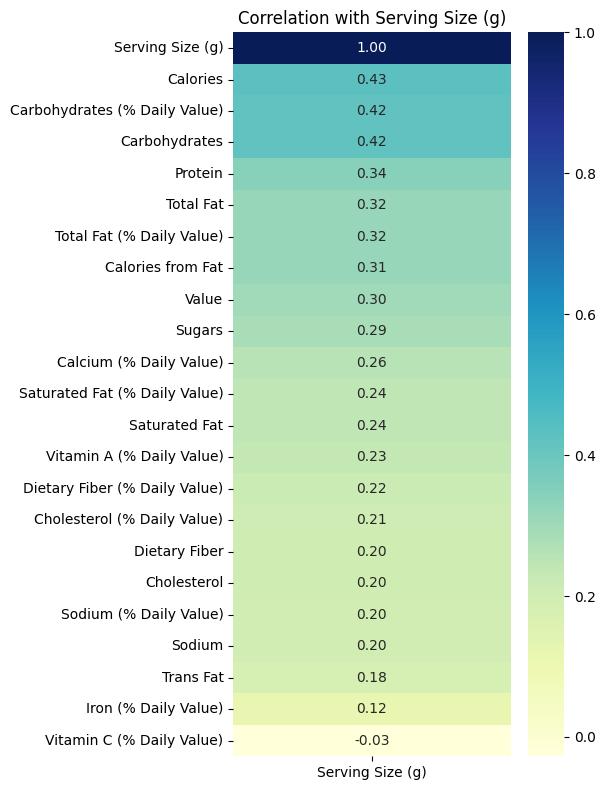

In [28]:
# Step 1: Compute correlation matrix for numeric columns
corr_matrix = data.corr(numeric_only=True)

# Step 2: Extract correlation of all columns with 'Serving Size (g)'
target_corr = corr_matrix[['Serving Size (g)']].sort_values(by='Serving Size (g)', ascending=False)

# Step 3: Plot vertical heatmap
plt.figure(figsize=(6, 8))
sns.heatmap(target_corr, annot=True, cmap='YlGnBu', fmt=".2f", cbar=True)

plt.title("Correlation with Serving Size (g)")
plt.tight_layout()
plt.show()

**How many calories does the average McDonald's value meal contain?**

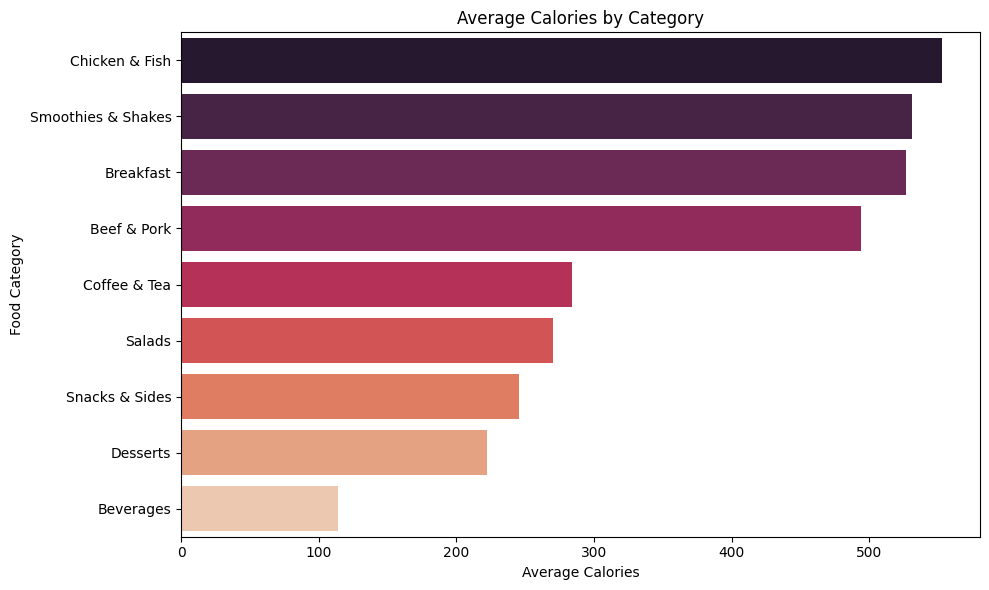

In [29]:
# Calculate average calories per category
avg_calories = data.groupby('Category')['Calories'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_calories.values, y=avg_calories.index, palette='rocket')

plt.xlabel("Average Calories")
plt.ylabel("Food Category")
plt.title("Average Calories by Category")
plt.tight_layout()
plt.show()

**How much do beverages, like soda or coffee, contribute to the overall caloric intake?**

In [35]:
beverages = data[data['Category'].str.lower() == 'beverages']
print(data['Category'].unique())
bev_total = beverages['Calories'].sum()
total_calories = data['Calories'].sum()
bev_percent = (bev_total / total_calories) * 100
print(f"🥤 Beverages contribute {bev_percent:.2f}% to the total caloric intake.")

['Breakfast' 'Beef & Pork' 'Chicken & Fish' 'Salads' 'Snacks & Sides'
 'Desserts' 'Beverages' 'Coffee & Tea' 'Smoothies & Shakes']
🥤 Beverages contribute 3.21% to the total caloric intake.


In [38]:
beverage_categories = ['Beverages', 'Coffee & Tea', 'Smoothies & Shakes']

# Filter rows that belong to any of these categories (case-insensitive)
beverage_data = data[data['Category'].str.lower().isin([cat.lower() for cat in beverage_categories])]

# Total calorie contribution
beverage_calories = beverage_data['Calories'].sum()
total_calories = data['Calories'].sum()
contribution_pct = (beverage_calories / total_calories) * 100

print(f"🥤 Combined beverage categories contribute {contribution_pct:.2f}% of total calories.")

🥤 Combined beverage categories contribute 46.91% of total calories.


Visualization 1: Pie Chart – Beverages vs Others

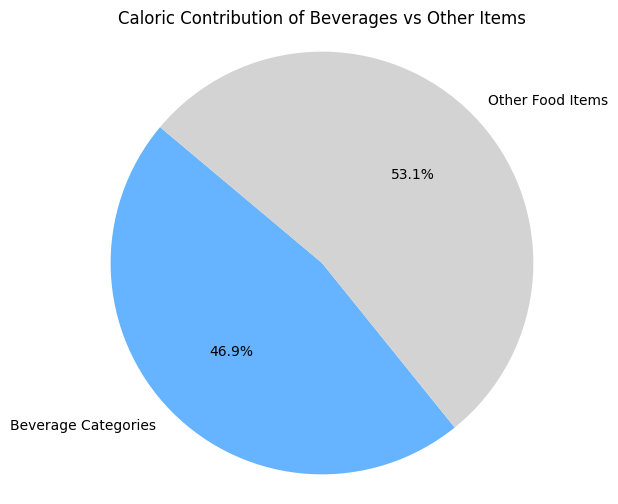

In [39]:
other_calories = total_calories - beverage_calories

# Pie chart
labels = ['Beverage Categories', 'Other Food Items']
sizes = [beverage_calories, other_calories]
colors = ['#66b3ff', '#d3d3d3']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Caloric Contribution of Beverages vs Other Items")
plt.axis('equal')
plt.show()

**Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?**

In [40]:
# Case-insensitive search
sandwich_data = data[data['Item'].str.contains('grilled|crispy', case=False, na=False)]

# Optional: Focus only on chicken sandwiches
sandwich_data = sandwich_data[sandwich_data['Item'].str.contains('chicken', case=False, na=False)]
sandwich_data['Style'] = sandwich_data['Item'].str.extract(r'(grilled|crispy)', flags=re.IGNORECASE)[0].str.lower()
# Group and get mean of nutrients
nutrition_compare = sandwich_data.groupby('Style')[[
    'Calories', 'Total Fat', 'Saturated Fat', 'Trans Fat', 'Protein'
]].mean().round(2)

print(nutrition_compare)

         Calories  Total Fat  Saturated Fat  Trans Fat  Protein
Style                                                          
crispy     520.00      25.14           6.11       0.14    24.93
grilled    386.92      13.92           4.73       0.04    28.62


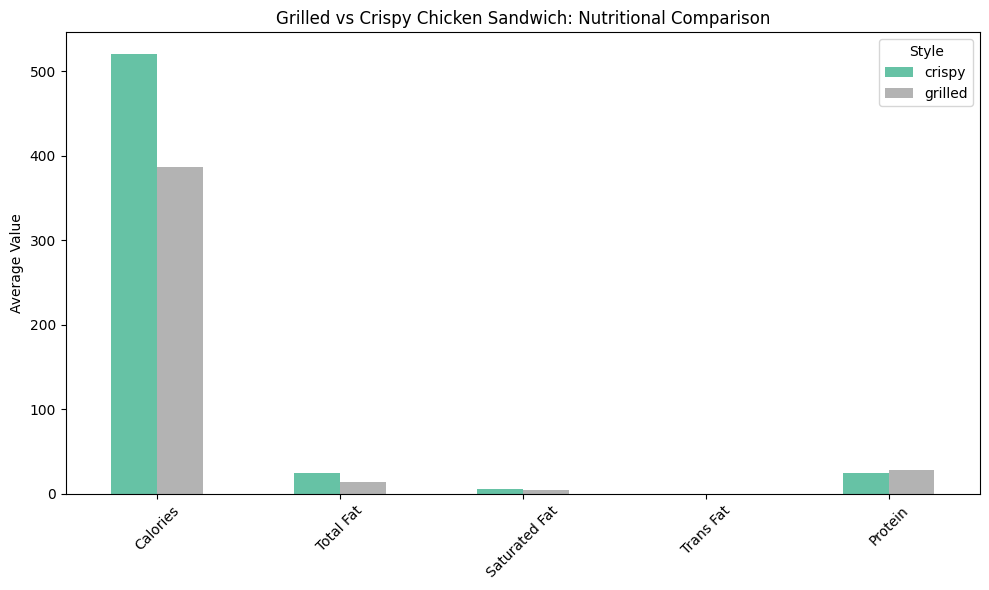

In [41]:
nutrition_compare.T.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title("Grilled vs Crispy Chicken Sandwich: Nutritional Comparison")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Style               crispy  grilled
Calories            520.00   386.92
Calories from Fat   224.29   126.15
Total Fat            25.14    13.92
Saturated Fat         6.11     4.73
Trans Fat             0.14     0.04
Cholesterol          58.21    75.00
Sodium             1148.57  1019.23
Carbohydrates        49.00    37.23
Dietary Fiber         2.93     3.00
Sugars                9.07     7.62
Protein              24.93    28.62


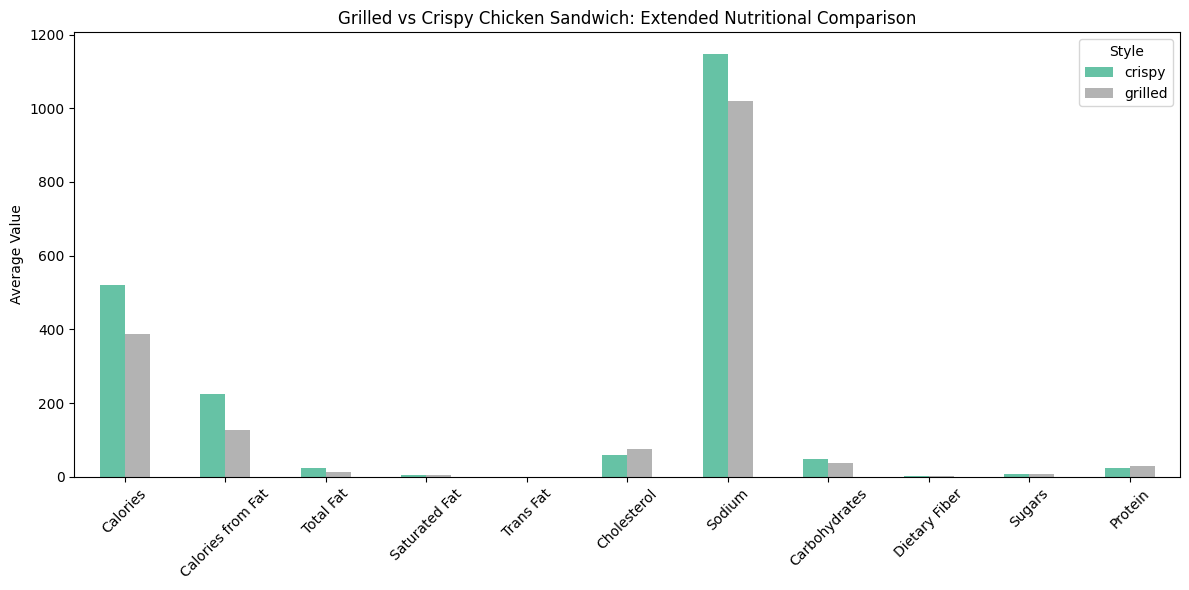

In [42]:
cols_to_compare = [
    'Calories',
    'Calories from Fat',
    'Total Fat',
    'Saturated Fat',
    'Trans Fat',
    'Cholesterol',
    'Sodium',
    'Carbohydrates',
    'Dietary Fiber',
    'Sugars',
    'Protein'
]
# Group by grilled vs crispy and calculate average of all key nutrients
nutrition_compare = sandwich_data.groupby('Style')[cols_to_compare].mean().round(2)

# View table
print(nutrition_compare.T)

nutrition_compare.T.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Grilled vs Crispy Chicken Sandwich: Extended Nutritional Comparison")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**What about ordering egg whites instead of whole eggs?**

In [43]:
#1. Filter Egg-Related Items
egg_data = data[data['Item'].str.contains('egg', case=False, na=False)]

#2. Separate Egg Whites and Whole Eggs
# Label items
egg_data['Type'] = egg_data['Item'].apply(
    lambda x: 'egg white' if 'egg white' in x.lower() else 'whole egg')

# 3. Compare Nutritional Averages
cols = ['Calories', 'Total Fat', 'Saturated Fat', 'Cholesterol', 'Protein']
egg_compare = egg_data.groupby('Type')[cols].mean().round(2)
print(egg_compare.T)

Type           egg white  whole egg
Calories          565.38     506.67
Total Fat          28.85      28.33
Saturated Fat      11.15      11.75
Cholesterol        41.54     267.50
Protein            23.69      22.08


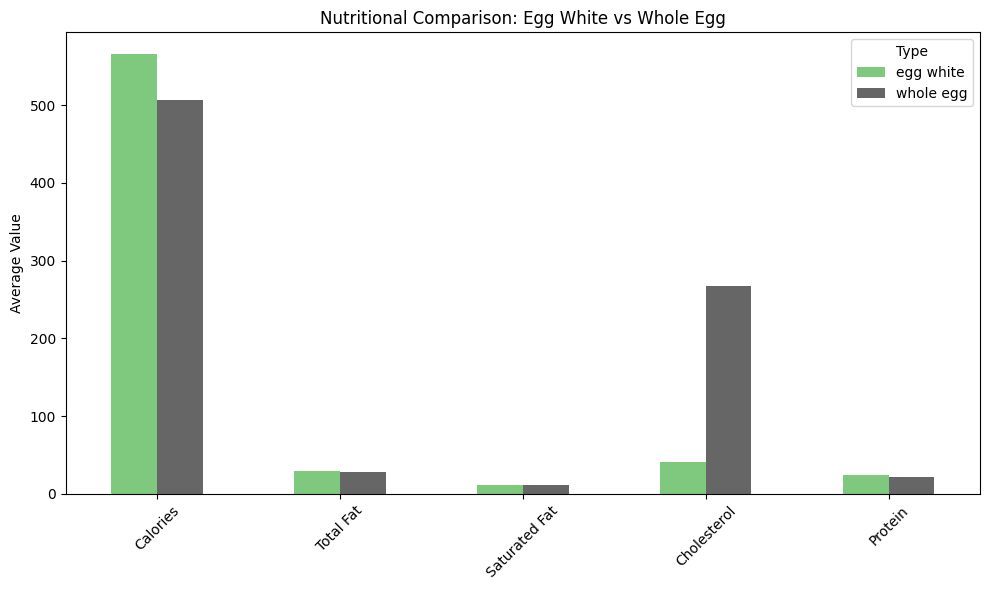

In [44]:
egg_compare.T.plot(kind='bar', figsize=(10, 6), colormap='Accent')
plt.title('Nutritional Comparison: Egg White vs Whole Egg')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
# -----------------------------
# STEP 1: Define nutrient targets
# -----------------------------
targets = {
    'Calories': 2000,
    'Protein': 50,
    'Total Fat': 70,
    'Carbohydrates': 300,
    'Dietary Fiber': 25,
    'Vitamin A (% Daily Value)': 100,
    'Vitamin C (% Daily Value)': 100,
    'Calcium (% Daily Value)': 100,
    'Iron (% Daily Value)': 100
}

nutrient_cols = list(targets.keys())

# -----------------------------
# STEP 2: Score and filter top nutrient items
# -----------------------------
data['Nutrient Score'] = data[nutrient_cols].fillna(0).sum(axis=1)
top_items = data.sort_values(by='Nutrient Score', ascending=False).head(30).reset_index(drop=True)

# -----------------------------
# STEP 3: Greedy selection function
# -----------------------------
def greedy_selection(df, targets):
    selected = []
    current = {key: 0 for key in targets}

    while True:
        if all(current[nutrient] >= targets[nutrient] for nutrient in targets):
            break

        best_item = None
        best_gain = -1

        for idx, row in df.iterrows():
            gain = sum(
                max(0, min(row[nutrient], targets[nutrient] - current[nutrient]))
                for nutrient in targets
            )
            if gain > best_gain:
                best_gain = gain
                best_item = row

        if best_item is None:
            break

        selected.append(best_item)
        for nutrient in targets:
            current[nutrient] += best_item[nutrient]
        df = df.drop(best_item.name)

    return pd.DataFrame(selected)

In [53]:
# -----------------------------
# STEP 4: Run greedy selection
# -----------------------------
optimal_menu = greedy_selection(top_items.copy(), targets)

print("\n✅ Selected Items to Meet Daily Nutrition:\n")
print(optimal_menu[['Item'] + nutrient_cols])



✅ Selected Items to Meet Daily Nutrition:

                                                 Item  Calories  Protein  \
0                        Chicken McNuggets (40 piece)      1880       87   
6                             Chocolate Shake (Large)       850       19   
25    Premium McWrap Chicken & Bacon (Crispy Chicken)       630       32   
16                             Bacon Clubhouse Burger       720       39   
14            Bacon Clubhouse Crispy Chicken Sandwich       750       36   
19  Premium McWrap Southwest Chicken (Crispy Chicken)       670       27   
1         Big Breakfast with Hotcakes (Large Biscuit)      1150       36   

    Total Fat  Carbohydrates  Dietary Fiber  Vitamin A (% Daily Value)  \
0       118.0            118              6                          0   
6        23.0            141              2                         30   
25       32.0             56              3                         60   
16       40.0             51              4        

<Figure size 1200x600 with 0 Axes>

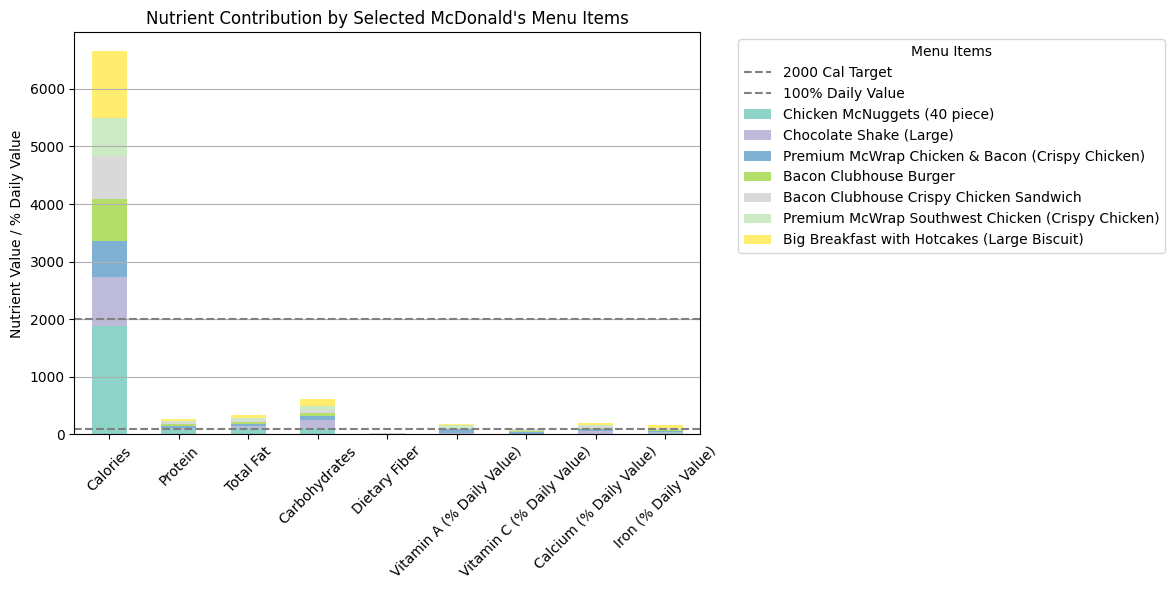

In [54]:
# -----------------------------
# STEP 5: Visualization
# -----------------------------
nutrient_df = optimal_menu[nutrient_cols].T
nutrient_df.columns = optimal_menu['Item']

plt.figure(figsize=(12, 6))
nutrient_df.plot(kind='bar', stacked=True, colormap='Set3', figsize=(12, 6))
plt.axhline(y=2000, color='gray', linestyle='--', label='2000 Cal Target') if 'Calories' in targets else None
plt.axhline(y=100, color='gray', linestyle='--', label='100% Daily Value')
plt.title("Nutrient Contribution by Selected McDonald's Menu Items")
plt.ylabel("Nutrient Value / % Daily Value")
plt.xticks(rotation=45)
plt.legend(title='Menu Items', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()